In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np
import os


import gc
import pickle as pickle

from sklearn.model_selection import KFold

from catboost import CatBoostRegressor
import lightgbm as lgbm

import itertools

import multiprocessing as mp
import importlib
from sklearn.model_selection import train_test_split

In [3]:
#tail -n +2 train.csv | split -l 150000
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [4]:
from os import listdir
from os.path import isfile, join

TRAIN_SPLITS='train'
splits = [f for f in listdir(TRAIN_SPLITS) if isfile(join(TRAIN_SPLITS, f))]

In [200]:
TIMESTEPS=1

import build_segment
importlib.reload(build_segment)

from build_segment import build_segment_f

split_chunks = np.array_split(splits,mp.cpu_count())

#def build_segment_f(splits, number_of_groups,test=False, augment=False, scale=True, noise=0.5):

param_test = False
param_augment = False
param_scale = False
param_noise = 0.3
param_smart_augment = True



if __name__ ==  '__main__':
    pool = mp.Pool(mp.cpu_count())
    res = [pool.apply_async(build_segment_f,\
        args=[chunk,TIMESTEPS,param_test,param_augment,param_scale,param_noise,param_smart_augment]) \
           for chunk in split_chunks]
    pool.close()
    pool.join()

0
0
0
0
0
0
0
0
100
100
100
100
100
100
100
100
200
200
200
200
200
200
200
200
300
300
300
300
300
300
300
300
400
400
400
400
400
400
400
400
500
500
500
500
500
500
500
500


In [134]:
res[0].get()[100]

,median,mean,max,min,std,abs,q25,q50,q75,sum,uniq,pos,negs,ssum,imax,imin,abs_nrg,abs_sum_chg,autocorr_10,cid_ce,kurtosis,mean_chg,reocurring_pct,r_sigma,ratio_to_length,skewness,perc_reocurr_dp,perc_reocurr_all,sum_reoccurr_val,sum_reoccurr_dp,mean_head,mean_tail,abs_diff_head_tail,pos_head,neg_head,pos_tail,neg_tail,time_to_failure,augmented
0,5.0,4.731192,41.0,-26.0,3.328457,67.0,3.0,5.0,7.0,709678.826558,38934.0,138372.0,7802.0,745327.994209,90734.0,102813.0,5.019421e+06,449812.820715,-0.125587,453.20706,4.655548,-0.000036,0.001618,0.042367,0.25956,0.058877,0.001618,0.74086,386.0,525715.0,4.742573,5.030979,21.846033,937.0,40.0,923.0,51.0,12.3846,True


In [201]:
columns=res[0].get()[0].columns.values

data = pd.DataFrame(columns=columns)


i=0
for r in res:
    for df in r.get():
        data = data.append(df)
        i+=1
        

data.reset_index(drop=True,inplace=True)


/home/shemery/.local/lib/python3.6/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [202]:

data.sample(10)

,abs,abs_diff_head_tail,abs_nrg,abs_sum_chg,augmented,autocorr_10,cid_ce,imax,imin,kurtosis,max,mean,mean_chg,mean_head,mean_tail,median,min,neg_head,neg_tail,negs,perc_reocurr_all,perc_reocurr_dp,pos,pos_head,pos_tail,q25,q50,q75,r_sigma,ratio_to_length,reocurring_pct,segment,skewness,ssum,std,sum,sum_reoccurr_dp,sum_reoccurr_val,time_to_failure,uniq
669,149.0,28.048290,5.923955e+06,673329.764102,True,-0.073830,512.025392,106079.0,106409.0,16.646561,83.0,4.358896,0.000006,4.571845,4.485539,4.208494,-66.0,103.0,116.0,18829.0,0.405567,0.001221,128593.0,883.0,863.0,2.000000,4.208494,7.0,0.036880,0.595160,0.001221,NaN,-0.107963,7.589901e+05,4.526926,653834.342343,263334.0,425.0,13.239897,89274.0
4295,87.0,14.000000,5.425658e+06,372171.000000,False,-0.255126,352.364738,111302.0,111278.0,8.994464,48.0,4.912667,-0.000033,4.743000,4.882000,5.000000,-39.0,17.0,21.0,6158.0,0.999940,0.887500,139124.0,949.0,949.0,3.000000,5.000000,7.0,0.035853,0.000533,0.887500,xzdqt,0.025105,7.756440e+05,3.469403,736900.000000,736813.0,346.0,7.454400,80.0
4314,250.0,47.000000,8.746503e+06,405668.000000,False,-0.447995,231.253740,41766.0,41741.0,40.345267,133.0,4.690260,-0.000053,5.279000,4.504000,5.000000,-117.0,213.0,32.0,13731.0,0.999753,0.793296,130183.0,756.0,924.0,2.000000,5.000000,7.0,0.037193,0.001193,0.793296,xzdwf,0.123256,8.546310e+05,6.025901,703539.000000,703448.0,786.0,1.921699,179.0
482,258.0,22.000000,1.054544e+07,419317.000000,False,-0.462506,207.615750,86269.0,142939.0,40.000239,137.0,4.560020,0.000033,4.120000,4.395000,5.000000,-121.0,98.0,44.0,16692.0,0.999760,0.826923,126846.0,842.0,912.0,2.000000,5.000000,7.0,0.036613,0.001387,0.826923,xzcsr,0.525126,8.841570e+05,7.036273,684003.000000,683380.0,1740.0,0.565499,208.0
4789,174.0,27.631462,5.901733e+06,714606.351735,True,-0.033029,527.716223,32864.0,111033.0,8.291469,87.0,4.304926,0.000051,4.440378,4.445067,4.184757,-87.0,130.0,146.0,21583.0,0.300340,0.000800,126406.0,863.0,839.0,1.599323,4.184757,7.0,0.042687,0.700220,0.000800,NaN,-0.033764,7.638793e+05,4.562072,645738.848365,193809.0,374.0,14.661496,105033.0
4367,201.0,25.194417,5.501310e+06,577630.868249,True,-0.053644,520.603941,127014.0,126910.0,40.439703,110.0,4.699280,0.000060,4.465051,4.635647,4.870731,-91.0,78.0,80.0,12120.0,0.405500,0.000930,135814.0,898.0,902.0,2.383861,4.870731,7.0,0.035533,0.595053,0.000930,NaN,0.277584,7.572880e+05,3.819971,704891.934576,284164.0,61.0,14.135799,89258.0
5689,1495.0,32.000000,7.242684e+07,520310.000000,False,-0.447537,141.624533,25076.0,24815.0,271.020315,793.0,4.533433,0.000000,4.620000,4.782000,5.000000,-702.0,107.0,40.0,21445.0,0.998380,0.628440,122005.0,850.0,935.0,2.000000,5.000000,7.0,0.016447,0.004360,0.628440,xzcjd,0.974333,1.214007e+06,21.501014,680015.000000,672903.0,-302.0,0.590699,654.0
1518,233.0,42.000000,6.767621e+06,391785.000000,False,-0.469688,253.450606,25867.0,25857.0,55.396896,131.0,4.212393,-0.000007,3.888000,4.046000,4.000000,-102.0,51.0,257.0,13934.0,0.999780,0.807018,128786.0,886.0,703.0,2.000000,4.000000,6.0,0.029760,0.001140,0.807018,xfb,0.336638,7.534890e+05,5.231942,631859.000000,631007.0,380.0,7.867896,171.0
2986,247.0,20.000000,9.080478e+06,412606.000000,False,-0.450393,219.166625,100335.0,100294.0,47.020192,109.0,4.146387,0.000000,4.265000,4.360000,4.000000,-138.0,84.0,57.0,17213.0,0.999807,0.853535,125231.0,862.0,904.0,2.000000,4.000000,7.0,0.030420,0.001320,0.853535,xzesn,-0.042839,8.070720e+05,6.583616,621958.000000,623193.0,1631.0,2.641398,198.0
2782,98.0,18.000000,4.888739e+06,369696.000000,False,-0.215915,360.444157,113950.0,113957.0,9.153317,52.0,4.609607,-0.000027,4.669000,4.873000,5.000000,-46.0,29.0,21.0,7048.0,0.999873,0.779070,137359.0,923.0,957.0,3.000000,5.000000,7.0,0.032413,0.000573,0.779070,xzdel,0.062841,7.311050e+05,3.367955,691441.000000,691226.0,384.0,0.069398,86.0


In [12]:
for column in data.columns.values:
    #col_mean = data[column].mean()
    if "augmented" not in column:
        data[f'log_{column}'] =  np.log(data[column])

/home/shemery/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.
/home/shemery/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


In [85]:
combinations2 = list(itertools.combinations(data.columns.values, 2))
combinations3 = list(itertools.combinations(data.columns.values, 3))


In [86]:

for combination in combinations2:
    if 'augmented' in combination or 'time_to_failure' in combination:
        continue
    f1 = combination[0]
    f2 = combination[1]
    feature = f'{f1}_mult_{f2}'
    data[feature] = data[f1] * data[f2]
    feature = f'{f1}_plus_{f2}'
    data[feature] = data[f1] + data[f2]
    feature = f'{f1}_div_{f2}'
    #print(feature)
    data[feature] = data[f1] / data[f2]
    data[feature] = pd.to_numeric(data[feature], downcast='float')


In [17]:

for combination in combinations3:
    if 'augmented' in combination or 'time_to_failure' in combination:
        continue
    f1 = combination[0]
    f2 = combination[1]
    f3 = combination[2]
    feature = f'{f1}_mult_{f2}_mult_{f3}'
    data[feature] = data[f1] * data[f2] * data[f3]
    feature = f'{f1}_plus_{f2}_plus_{f3}'
    data[feature] = data[f1] + data[f2] + data[f3]
    feature = f'{f1}_div_{f2}_div_{f3}'
    #print(feature)
    data[feature] = data[f1] / data[f2] / data[f3]
    data[feature] = pd.to_numeric(data[feature], downcast='float')
    

In [10]:
splits

shared_train_data, shared_val_data = train_test_split(splits, test_size=0.1, random_state=42)

import pickle

pickle.dump(shared_train_data, open( "shared_train_data.pickle", "wb" ))
pickle.dump(shared_val_data, open( "shared_val_data.pickle", "wb" ))

In [203]:
drop = ['augmented', 'segment']

# training__ = data[data['segment'].isin(shared_train_data)]
# train_y = training__['time_to_failure']
# train_data = training__.drop(['segment', 'augmented', 'time_to_failure'], axis=1)

# validation__ = data[data['segment'].isin(shared_val_data)]
# val_y = validation__['time_to_failure']
# val_data = validation__.drop(['segment', 'augmented', 'time_to_failure'], axis=1)

# test_size = 0.1
# train_data, val_data, y_train, y_val = train_test_split(data, targets, test_size=test_size, random_state=42)

val_size = int(len(data)*0.1)
non_augmented = data[data['augmented'] == False]
val_indices = np.random.choice(non_augmented.index.values, val_size)
val_data = data[data.index.isin(val_indices)].drop(columns=drop)
train_data = data[~data.index.isin(val_indices)].drop(columns=drop)

train_y = train_data['time_to_failure']
val_y = val_data['time_to_failure']

train_data = train_data.drop('time_to_failure', axis=1)
val_data = val_data.drop('time_to_failure', axis=1)

In [204]:
len(val_data)

561

In [ ]:
list(all_features)

In [205]:
all_features = train_data.columns.values
cb_features = all_features
lg_features = all_features

In [210]:

cb_model = CatBoostRegressor(iterations=10000,
                             #learning_rate=0.05,
                             eval_metric='MAE',
                             #task_type = "GPU",
                             use_best_model=True,
                             od_type = "Iter",
                             od_wait = 10,
                             #depth=3,
                             #l2_leaf_reg=300,
                             #random_strength=100,
                             #border_count=254,
                             #bagging_temperature = 30,
                             #cat_features=[0],
                             random_seed = 42)



cb_model.fit(train_data[cb_features], train_y, #cat_features=categorical_features_indices,
             eval_set=(val_data[cb_features],val_y),
             #cat_features=categorical_features_pos,         
             verbose=True)

cb_scores = {}
for i,score in enumerate(cb_model.get_feature_importance()):
    cb_scores[cb_features[i]] = score

sorted(cb_scores.items(), key=lambda x: x[1])[::-1]

0:	learn: 7.9952242	test: 5.5593839	best: 5.5593839 (0)	total: 17.1ms	remaining: 2m 50s
1:	learn: 7.7643135	test: 5.3992489	best: 5.3992489 (1)	total: 26ms	remaining: 2m 9s
2:	learn: 7.5401939	test: 5.2481368	best: 5.2481368 (2)	total: 34.4ms	remaining: 1m 54s
3:	learn: 7.3239383	test: 5.1012351	best: 5.1012351 (3)	total: 42.1ms	remaining: 1m 45s
4:	learn: 7.1155878	test: 4.9595849	best: 4.9595849 (4)	total: 49.8ms	remaining: 1m 39s
5:	learn: 6.9151923	test: 4.8205094	best: 4.8205094 (5)	total: 57.5ms	remaining: 1m 35s
6:	learn: 6.7215651	test: 4.6933811	best: 4.6933811 (6)	total: 65.4ms	remaining: 1m 33s
7:	learn: 6.5356076	test: 4.5701840	best: 4.5701840 (7)	total: 75.3ms	remaining: 1m 34s
8:	learn: 6.3553075	test: 4.4502942	best: 4.4502942 (8)	total: 83ms	remaining: 1m 32s
9:	learn: 6.1825832	test: 4.3391757	best: 4.3391757 (9)	total: 96.5ms	remaining: 1m 36s
10:	learn: 6.0172722	test: 4.2359233	best: 4.2359233 (10)	total: 109ms	remaining: 1m 38s
11:	learn: 5.8560277	test: 4.1346050

98:	learn: 1.7575429	test: 2.1730026	best: 2.1730026 (98)	total: 1.02s	remaining: 1m 41s
99:	learn: 1.7527150	test: 2.1725301	best: 2.1725301 (99)	total: 1.03s	remaining: 1m 41s
100:	learn: 1.7485034	test: 2.1725171	best: 2.1725171 (100)	total: 1.04s	remaining: 1m 42s
101:	learn: 1.7446895	test: 2.1729613	best: 2.1725171 (100)	total: 1.06s	remaining: 1m 42s
102:	learn: 1.7405525	test: 2.1728846	best: 2.1725171 (100)	total: 1.07s	remaining: 1m 42s
103:	learn: 1.7372931	test: 2.1735530	best: 2.1725171 (100)	total: 1.08s	remaining: 1m 42s
104:	learn: 1.7342963	test: 2.1744085	best: 2.1725171 (100)	total: 1.09s	remaining: 1m 42s
105:	learn: 1.7311784	test: 2.1744087	best: 2.1725171 (100)	total: 1.1s	remaining: 1m 42s
106:	learn: 1.7280849	test: 2.1747527	best: 2.1725171 (100)	total: 1.11s	remaining: 1m 42s
107:	learn: 1.7255081	test: 2.1747477	best: 2.1725171 (100)	total: 1.12s	remaining: 1m 42s
108:	learn: 1.7226647	test: 2.1745426	best: 2.1725171 (100)	total: 1.13s	remaining: 1m 42s
109:

[('cid_ce', 18.394944396784982),
 ('reocurring_pct', 11.102754402569866),
 ('abs_sum_chg', 10.673878313665549),
 ('perc_reocurr_dp', 8.940550338397049),
 ('negs', 8.261782963084858),
 ('uniq', 7.23207498747021),
 ('perc_reocurr_all', 6.426836842619832),
 ('sum_reoccurr_dp', 4.223005330535561),
 ('ssum', 3.9563450335127928),
 ('autocorr_10', 3.7180647941811533),
 ('r_sigma', 3.670315434343879),
 ('abs_nrg', 3.60885889285333),
 ('pos', 3.4899771769956676),
 ('q75', 2.6333546996886543),
 ('ratio_to_length', 2.6037334345113603),
 ('std', 1.063522958785247)]

In [209]:
cb_features = [item[0] for item in cb_scores.items() if item[1] > 1]

In [26]:
cb_model.save_model("cb_model")

In [213]:
lgtrain = lgbm.Dataset(train_data[lg_features], label=train_y)
lgval = lgbm.Dataset(val_data[lg_features], label=val_y)


# needs to keep overfiting under control, default params don't cut it at all
params = {
        "num_threads": 8,
        "verbosity": -1,
        #"zero_as_missing": "true",
        "boosting":'gbdt',
        "objective" : "regression",
        "metric" : "mae",
        "seed": 42,
        "learning_rate" : 0.05,
        #"min_data_in_leaf": 100,
        "num_leaves": 4,
        #"max_depth" : 4,
        #"bagging_fraction": 0.7,
        #"bagging_freq": 1,
        #"feature_fraction": 0.7,
        #"lambda_l1": 10,
}

evals_result = {}
model_lgb = lgbm.train(params, lgtrain, 10000, 
                      valid_sets=[lgval], 
                      early_stopping_rounds=3, 
                      verbose_eval=10, 
                      evals_result=evals_result)


lg_scores = {}
for i,score in enumerate(model_lgb.feature_importance()):
    lg_scores[lg_features[i]] = score

sorted(lg_scores.items(), key=lambda x: x[1])[::-1]

Training until validation scores don't improve for 3 rounds.
[10]	valid_0's l1: 3.06724
[20]	valid_0's l1: 2.6728
[30]	valid_0's l1: 2.47247
[40]	valid_0's l1: 2.36004
[50]	valid_0's l1: 2.2867
[60]	valid_0's l1: 2.24525
[70]	valid_0's l1: 2.22127
[80]	valid_0's l1: 2.20956
[90]	valid_0's l1: 2.20416
[100]	valid_0's l1: 2.19901
Early stopping, best iteration is:
[100]	valid_0's l1: 2.19901


[('sum_reoccurr_dp', 52),
 ('negs', 42),
 ('cid_ce', 37),
 ('ssum', 28),
 ('r_sigma', 22),
 ('mean', 18),
 ('ratio_to_length', 17),
 ('pos', 15),
 ('abs_sum_chg', 10),
 ('q75', 9),
 ('abs_nrg', 9),
 ('perc_reocurr_all', 8),
 ('pos_head', 7),
 ('mean_head', 5),
 ('sum_reoccurr_val', 4),
 ('skewness', 4),
 ('neg_head', 4),
 ('autocorr_10', 3),
 ('perc_reocurr_dp', 2),
 ('kurtosis', 2),
 ('imin', 2)]

In [212]:
lg_features = [item[0] for item in lg_scores.items() if item[1] > 0]

In [172]:
model_lgb.save_model("lg_model")

In [266]:
from sklearn.linear_model import ElasticNet, Lasso, Ridge, LinearRegression,BayesianRidge, HuberRegressor

lr_features = cb_features#[0:5]# + lg_features
lr_features = lg_features


lr_model =  LinearRegression()
lr_model.fit(train_data[lr_features], train_y)

from sklearn.metrics import mean_absolute_error

train_preds = lr_model.predict(val_data[lr_features])
print("mae: ", mean_absolute_error(val_y, train_preds))

mae:  2.159244975421489


In [215]:
rf_features = all_features

In [218]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(max_depth=5, random_state=0, n_estimators=100)
rf_model.fit(train_data[rf_features], train_y)

val_preds = rf_model.predict(val_data[rf_features])
print("mae: ", mean_absolute_error(val_y, val_preds))

feature_importances = pd.DataFrame(rf_model.feature_importances_,
                        index = rf_features,
                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances

mae:  2.190266068833995


,importance
cid_ce,0.735487
abs_sum_chg,0.113368
negs,0.058639
sum_reoccurr_dp,0.052383
ssum,0.017387
uniq,0.014482
r_sigma,0.008254


In [217]:
rf_features = feature_importances[feature_importances['importance'] > 0.005].index.to_list()

In [196]:
stacked_cb_preds = []
stacked_lg_preds = []
stacked_lr_preds = []
stacked_rf_preds = []


# grouped = data[data['segment'].isin(shared_val_data)].sort_values(by='segment')\
#             .drop(['augmented', 'time_to_failure'], axis=1)\
#             .groupby('segment')


# for name, group in grouped:


# stacked_cb_preds.append(cb_model.predict(val_data[cb_features])[0])
# stacked_lg_preds.append(model_lgb.predict(val_data[lg_features])[0])
# stacked_lr_preds.append(lr_model.predict(val_data[lr_features])[0])
# stacked_rf_preds.append(rf_model.predict(val_data[rf_features])[0])




In [80]:
stacked_lstm_preds = pickle.load(open("stacked_lstm_val.pickle", "rb"))

In [197]:
len(stacked_cb_preds)

1

In [244]:
#stacked = pd.DataFrame(columns=['cb', 'lg', 'lr', 'rf', 'lstm', 'target'])
stacked = pd.DataFrame(columns=['cb', 'lg', 'lr', 'rf', 'target'])

# stacked['cb'] = stacked_cb_preds
# stacked['lg'] = stacked_lg_preds
# stacked['lr'] = stacked_lr_preds
# stacked['rf'] = stacked_rf_preds

stacked['cb'] = cb_model.predict(val_data[cb_features])
stacked['lg'] = model_lgb.predict(val_data[lg_features])
stacked['lr'] = lr_model.predict(val_data[lr_features])
stacked['rf'] = rf_model.predict(val_data[rf_features])

#stacked['lstm'] = stacked_lstm_preds
# stacked['target'] = data[data['segment'].isin(shared_val_data)]\
#             .sort_values(by='segment')['time_to_failure'].values

stacked['target'] = val_y.values

In [245]:
stacked.describe()

,cb,lg,lr,rf,target
count,561.000000,561.000000,561.000000,561.000000,561.000000
mean,5.468853,5.783701,5.706799,5.723722,5.726448
std,2.157978,2.314594,2.269270,2.373581,3.687029
min,1.805169,2.385200,-1.104311,2.249201,0.028496
25%,3.282268,3.458367,3.871983,3.500309,2.762798
50%,5.485915,5.832990,5.310550,5.661129,5.330197
75%,7.610873,7.985594,7.515276,7.920885,8.213597
max,9.180271,10.430930,11.355633,10.777282,15.595700


In [255]:
stacked.sample(10)
#meta_model.coef_

,cb,lg,lr,rf,target
279,7.868018,8.451246,8.625830,8.951259,7.370299
14,6.037870,6.304259,5.169946,6.049157,5.305100
384,7.941601,8.143203,9.006382,8.912954,9.488100
511,7.148068,6.981385,6.013589,6.970825,3.221800
271,3.864835,4.105930,4.914100,4.140848,8.023198
541,2.784485,3.023538,3.281436,2.577818,2.638799
0,8.579276,8.520706,9.758717,8.536042,10.088397
552,5.942200,6.028031,4.923022,5.716216,5.330197
365,2.678869,2.854782,4.024322,2.589316,3.543698
284,3.258105,3.286944,3.340401,3.473943,6.349397


In [249]:
data['time_to_failure'].describe()

count    6011.000000
mean     8.001971   
std      4.754135   
min      0.006398   
25%      3.811798   
50%      7.760896   
75%      12.422848  
max      16.103196  
Name: time_to_failure, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6b95e21a90>]],
      dtype=object)

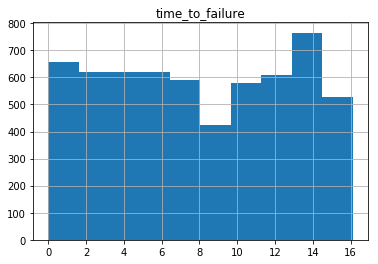

In [206]:
data.hist(column='time_to_failure')#.show()

In [265]:
meta_model =  Lasso(positive=True, alpha=0.1)
meta_model.fit(stacked.drop('target',axis=1)[['cb','lr']], stacked['target'])

from sklearn.metrics import mean_absolute_error

meta_preds = meta_model.predict(stacked.drop('target',axis=1)[['cb','lr']])
print("mae: ", mean_absolute_error(meta_preds, stacked['target']))
meta_model.coef_

mae:  2.143067539751856


array([0.44193793, 0.67889721])

array([0.35814651, 0.6766338 ])

In [92]:
TEST_SPLITS='test'
test_splits = [f for f in listdir(TEST_SPLITS) if isfile(join(TEST_SPLITS, f))]

In [93]:
test_split_chunks = np.array_split(test_splits,mp.cpu_count())
    
    
param_test = True
param_augment = False
param_scale = False
param_noise = 0.6


if __name__ ==  '__main__':
    pool = mp.Pool(mp.cpu_count())
    test_res = [pool.apply_async(build_segment_f,args=[chunk,TIMESTEPS,param_test,param_augment,param_scale,param_noise]) for chunk in test_split_chunks]
    pool.close()
    pool.join()

0
0
0
0
0
0
0
0
100
100
100
100
100
100
100
100
200
200
200
200
200
200
200
200
300
300
300
300
300
300
300
300


In [94]:
columns=test_res[0].get()[0].columns.values

test_data = pd.DataFrame(columns=columns)


i=0
for r in test_res:
    for df in r.get():
        #print(df)
        test_data = test_data.append(df)
        #print(len(test_data))
        i+=1
        

test_data.reset_index(drop=True,inplace=True)
print(len(test_data))

2624


In [ ]:
combinations2 = list(itertools.combinations(test_data.columns.values, 2))
combinations3 = list(itertools.combinations(test_data.columns.values, 3))


In [ ]:

for combination in combinations2:
    if 'seg_id' in combination or 'time_to_failure' in combination:
        continue
    f1 = combination[0]
    f2 = combination[1]
    feature = f'{f1}_mult_{f2}'
    test_data[feature] = test_data[f1] * test_data[f2]
    feature = f'{f1}_plus_{f2}'
    test_data[feature] = test_data[f1] + test_data[f2]
    feature = f'{f1}_div_{f2}'
    #print(feature)
    test_data[feature] = test_data[f1] / test_data[f2]
    test_data[feature] = pd.to_numeric(test_data[feature], downcast='float')


In [ ]:

for combination in combinations3:
    if 'seg_id' in combination or 'time_to_failure' in combination:
        continue
    f1 = combination[0]
    f2 = combination[1]
    f3 = combination[2]
    feature = f'{f1}_mult_{f2}_mult_{f3}'
    test_data[feature] = test_data[f1] * test_data[f2] * test_data[f3]
    feature = f'{f1}_plus_{f2}_plus_{f3}'
    test_data[feature] = test_data[f1] + test_data[f2] + test_data[f3]
    feature = f'{f1}_div_{f2}_div_{f3}'
    #print(feature)
    test_data[feature] = test_data[f1] / test_data[f2] / test_data[f3]
    test_data[feature] = pd.to_numeric(test_data[feature], downcast='float')
    

In [95]:
ids = test_data['seg_id'].apply(lambda id: id.split('.')[0])

In [97]:
cb_preds = cb_model.predict(test_data[cb_features])
lg_preds = model_lgb.predict(test_data[lg_features])
lr_preds = lr_model.predict(test_data[lr_features])
rf_preds = rf_model.predict(test_data[rf_features])

In [ ]:
lr_preds = lr_model.predict(test_data[lr_features])

In [ ]:
preds = (lg_preds * 0.5) + (lr_preds * 0.5)


In [101]:

submission = pd.DataFrame(ids)
submission.columns = ['seg_id']
submission['time_to_failure'] = rf_preds

submission.to_csv('rf_preds.csv', index=False)

In [ ]:
submission["time_to_failure"].describe()

In [ ]:
submission.head()

In [102]:
cb_preds = pd.read_csv('cb_preds.csv')['time_to_failure']
lg_preds = pd.read_csv('lg_preds.csv')['time_to_failure']
lr_preds = pd.read_csv('lr_preds.csv')['time_to_failure']
rf_preds = pd.read_csv('rf_preds.csv')['time_to_failure']
lstm_preds = pd.read_csv('lstm_preds.csv')['time_to_failure']




In [267]:
np.corrcoef([cb_preds, lg_preds, lr_preds, rf_preds])#, lstm_preds])

array([[1.        , 0.98685109, 0.93244451, 0.98776879],
       [0.98685109, 1.        , 0.93064613, 0.98523281],
       [0.93244451, 0.93064613, 1.        , 0.92330153],
       [0.98776879, 0.98523281, 0.92330153, 1.        ]])

In [124]:
stacked_test = pd.DataFrame(columns=['cb', 'lg', 'lr', 'rf', 'lstm'])
stacked_test['cb'] = cb_preds
stacked_test['lg'] = lg_preds
stacked_test['lr'] = lr_preds
stacked_test['rf'] = rf_preds
stacked_test['lstm'] = lstm_preds


final_preds = meta_model.predict(stacked_test)


In [125]:
submission = pd.DataFrame(ids)
submission.columns = ['seg_id']
submission['time_to_failure'] = final_preds

submission.to_csv('final_preds.csv', index=False)



In [114]:
submission["time_to_failure"].describe()

count    2624.000000
mean     5.694498   
std      2.444551   
min     -6.191154   
25%      3.691049   
50%      5.144718   
75%      7.775610   
max      11.304780  
Name: time_to_failure, dtype: float64

In [126]:
submission["time_to_failure"].describe()

count    2624.000000
mean     5.642406   
std      2.223331   
min     -4.319585   
25%      3.883431   
50%      5.081091   
75%      7.549768   
max      10.355927  
Name: time_to_failure, dtype: float64